In [1]:
import pandas as pd
from openpyxl import workbook,load_workbook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib
from datetime import datetime
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import ChartType
fontManager.addfont(r'C:\Users\gary1\OneDrive\文件\GitHub\Wiwynn_excel_automation_python_project\TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [23]:
import pyodbc
import pandas as pd
from dbpool import ConnectionPool

class MSSQLDB:
    def __init__(self, server, database, username, password):
        self.server = server
        self.database = database
        self.username = username
        self.password = password
        self.pool = ConnectionPool(self._create_connection, self._close_connection)

    @staticmethod
    def _create_connection():
        return pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+MSSQLDB.server+';DATABASE='+MSSQLDB.database+';UID='+MSSQLDB.username+';PWD='+ MSSQLDB.password)

    @staticmethod
    def _close_connection(conn):
        conn.close()

    def read_table(self, table_name):
        with self.pool.get_connection() as conn:
            df = pd.read_sql('SELECT * FROM ' + table_name, conn)
        return df

In [16]:
import pymssql

try:
    # 連接資料庫
    conn = pymssql.connect(server="127.0.0.1", user='sa', password='Gary0830', database='Wiwynn_project')
    cursor = conn.cursor()
    # cursor.execute('SELECT * FROM table_name')
    # result = cursor.fetchall()
    # cursor.close()
    # conn.close()
    print("連接成功！")

except Exception as e:
    print("連接失敗：", e)

連接失敗： (20009, b'DB-Lib error message 20009, severity 9:\nUnable to connect: Adaptive Server is unavailable or does not exist (127.0.0.1)\nNet-Lib error during Unknown error (10061)\nDB-Lib error message 20009, severity 9:\nUnable to connect: Adaptive Server is unavailable or does not exist (127.0.0.1)\nNet-Lib error during Unknown error (10061)\n')


In [17]:
import pymssql
import pandas as pd
from dbutils.pooled_db import PooledDB

class MSSQLDB:
    def __init__(self, server, database, username, password):
        self.server = server
        self.database = database
        self.username = username
        self.password = password
        self.pool = PooledDB(
            creator=pymssql,
            host=self.server,
            port=1466, 
            user=self.username,
            password=self.password,
            charset="utf8",
            database=self.database,
            maxconnections=10
        )

    def read_table(self, table_name):
        with self.pool.connection() as conn:
            cursor = conn.cursor()
            cursor.execute('SELECT * FROM {}'.format(table_name=table_name))
            df = pd.DataFrame(cursor.fetchall())
        return df

In [18]:
db = MSSQLDB('127.0.0.1', 'Wiwynn_project', 'sa', 'Gary0830')
df = db.read_table('DataCoSupplyChainDataset')
print(df)

ProgrammingError: (102, b"Incorrect syntax near 'DataCoSupplyChainDataset'.DB-Lib error message 20018, severity 15:\nGeneral SQL Server error: Check messages from the SQL Server\n")

In [3]:
# 將 'order date (DateOrders)' 欄位轉換為日期格式
df = pd.read_csv('./archive/DataCoSupplyChainDataset.csv',encoding='latin1')
df['order date (DateOrders)'] = df['order date (DateOrders)'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').strftime('%Y/%m/%d'))
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
# 篩選出第一季的資料
q1_data = df[(df['order date (DateOrders)'].dt.quarter == 1) & (df['order date (DateOrders)'].dt.year == 2017)]

In [4]:
q1_data.reset_index(inplace = True)

In [5]:
q1_data.columns

Index(['index', 'Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'P

In [6]:
# 將 'order date (DateOrders)' 欄位轉換為日期格式
df = pd.read_csv('./archive/DataCoSupplyChainDataset.csv',encoding='latin1')
df['order date (DateOrders)'] = df['order date (DateOrders)'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').strftime('%Y/%m/%d'))
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
# 篩選出第一季的資料
q1_data = df[(df['order date (DateOrders)'].dt.quarter == 1) & (df['order date (DateOrders)'].dt.year == 2017)]
product = q1_data.groupby('Product Name')[['Sales','Order Item Quantity']].sum().reset_index()
a = q1_data.groupby('Product Name')['Category Name'].unique().reset_index()
product = pd.merge(product,a)
product['Category Name'] = product['Category Name'].apply(lambda x : x[0])

,Product Name,Sales,Order Item Quantity,Category Name
0,Bag Boy Beverage Holder,1849.259979,74,Golf Gloves
1,Bridgestone e6 Straight Distance NFL Carolina,2239.299984,70,Electronics
2,Bridgestone e6 Straight Distance NFL San Dieg,2943.079981,92,Electronics
3,Bridgestone e6 Straight Distance NFL Tennesse,3262.979971,102,Electronics
4,Clicgear 8.0 Shoe Brush,959.039997,96,Golf Gloves
5,Clicgear Rovic Cooler Bag,4078.980045,102,Golf Gloves
6,Columbia Men's PFG Anchor Tough T-Shirt,3150.000000,105,Shop By Sport
7,Diamondback Women's Serene Classic Comfort Bi,389074.074267,1297,Camping & Hiking
8,ENO Atlas Hammock Straps,2759.079975,92,Hunting & Shooting
9,Field & Stream Sportsman 16 Gun Fire Safe,599970.016500,1500,Fishing


In [7]:
product_Category = q1_data.groupby('Category Name')[['Order Item Quantity','Sales']].sum().reset_index()
product

,Category Name,Order Item Quantity,Sales
0,Accessories,562,14044.379892
1,Baseball & Softball,195,8948.050243
2,Boxing & MMA,97,5332.090119
3,Camping & Hiking,1297,389074.074267
4,Cardio Equipment,3603,352425.089819
5,Cleats,6621,397193.800836
6,Electronics,944,38306.560415
7,Fishing,1500,599970.016500
8,Fitness Accessories,92,3219.080059
9,Girls' Apparel,314,13214.210060


In [10]:
import os
import datetime

current_directory = os.getcwd()
now = datetime.datetime.now()
filename = "report_" + now.strftime("%Y-%m-%d_%H-%M") + ".xlsx"
filepath = os.path.join(current_directory, filename).replace("/", "\\")
print(filepath)

c:\Users\gary1\OneDrive\文件\GitHub\Wiwynn_excel_automation_python_project\report_2023-05-10_16:45.xlsx


In [129]:
product = q1_data.groupby('Product Name')
product.get_group('Bag Boy Beverage Holder')['Category Name']

2542    Golf Gloves
2543    Golf Gloves
2544    Golf Gloves
2545    Golf Gloves
2546    Golf Gloves
2547    Golf Gloves
2548    Golf Gloves
2549    Golf Gloves
2550    Golf Gloves
2551    Golf Gloves
2552    Golf Gloves
2553    Golf Gloves
2554    Golf Gloves
2555    Golf Gloves
2556    Golf Gloves
2557    Golf Gloves
2558    Golf Gloves
2559    Golf Gloves
2560    Golf Gloves
2561    Golf Gloves
2562    Golf Gloves
2563    Golf Gloves
2564    Golf Gloves
2565    Golf Gloves
2566    Golf Gloves
2567    Golf Gloves
Name: Category Name, dtype: object

In [71]:
# 計算每個國家的銷售總額
sales_by_country = df.groupby('Order Country')['Sales'].sum().reset_index()

# 繪製地圖
world_map = (
    Map(init_opts=opts.InitOpts(bg_color='#404a59'))
    .add('銷售額', [list(z) for z in zip(sales_by_country['Order Country'], sales_by_country['Sales'])], 'world', is_map_symbol_show=False)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='全球銷售狀態', pos_left='center', title_textstyle_opts=opts.TextStyleOpts(color='white', font_size=24)),
        visualmap_opts=opts.VisualMapOpts(max_=sales_by_country['Sales'].max()),
    )
    .render('Map1.html')
)

In [28]:
group_day = df.groupby('order date (DateOrders)')
daily_data = group_day.get_group('2018/01/31')[['Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Product Price', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order Status', 'Product Category Id', 'Product Name', 'shipping date (DateOrders)']]

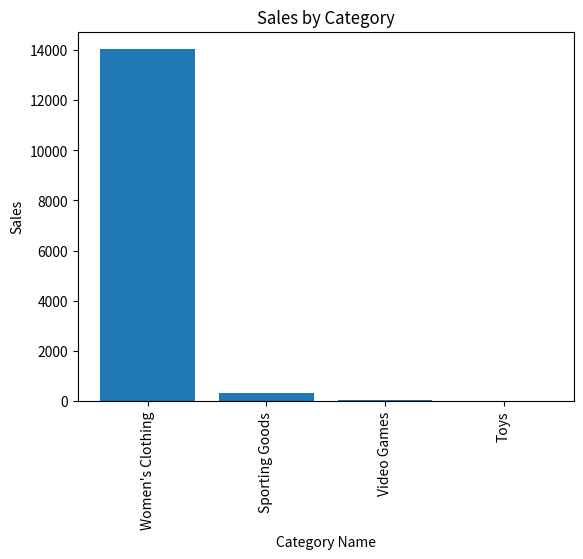

In [38]:
# 篩選出需要的欄位
selected_columns = ['Category Name', 'Sales']
daily_data1 = daily_data[selected_columns]

# 以 Category Name 為分組依據，計算每個產品類別的總銷售額
sales_by_category = daily_data1.groupby('Category Name')['Sales'].sum()

# 將結果轉換為DataFrame
sales_by_category = pd.DataFrame(sales_by_category)

# 以總銷售額排序
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)

# 製作長條圖
plt.bar(sales_by_category.index, sales_by_category['Sales'])
plt.xticks(rotation=90)
plt.xlabel('Category Name')
plt.ylabel('Sales')
plt.title('Sales by Category')
plt.show()

In [ ]:
df['order date (DateOrders)'].unique()

array(['2018/01/31', '2018/01/13', '2018/01/12', ..., '2017/12/07',
       '2017/12/06', '2017/12/05'], dtype=object)

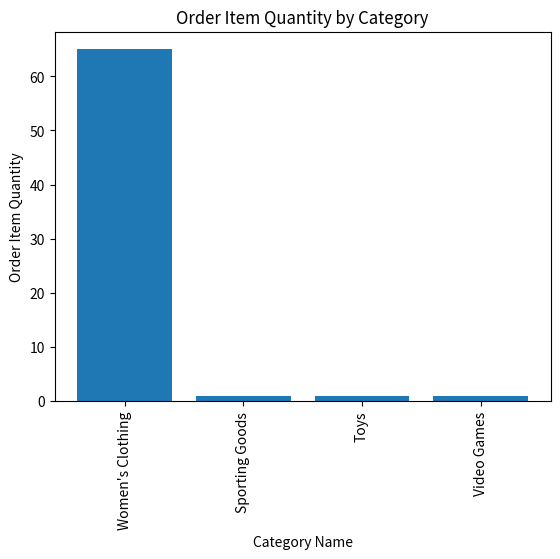

In [42]:
# 篩選出需要的欄位
selected_columns = ['Category Name', 'Order Item Quantity']
daily_data1 = daily_data[selected_columns]

# 以 Category Name 為分組依據，計算每個產品類別的銷售數量
quantity_by_category = daily_data1.groupby('Category Name')['Order Item Quantity'].sum()

# 將結果轉換為DataFrame
quantity_by_category = pd.DataFrame(quantity_by_category)

# 以銷售數量排序
quantity_by_category = quantity_by_category.sort_values(by='Order Item Quantity', ascending=False)

# 製作長條圖
plt.bar(quantity_by_category.index, quantity_by_category['Order Item Quantity'])
plt.xticks(rotation=90)
plt.xlabel('Category Name')
plt.ylabel('Order Item Quantity')
plt.title('Order Item Quantity by Category')
plt.show()